<a href="https://colab.research.google.com/github/mafiTec/Apple_Stock_Price_Prediction/blob/main/Stock_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)

To pridict the sock price of a corporation (Apple.Inc), using the past 60 day stck price.

Imports The Libraries

In [88]:
import math
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Read The data Set 

In [89]:
data = pd.read_csv("/content/drive/MyDrive/ML_Project/AAPL_Price_pridection.csv")

data

,Date,Open,High,Low,Close,Volume
0,12/7/2011,13.9261,13.9621,13.8129,13.8961,305000048
1,12/8/2011,13.9803,14.1250,13.9368,13.9521,376356580
2,12/9/2011,14.0303,14.0728,13.9653,14.0578,297143408
3,12/12/2011,13.9886,14.0678,13.9089,13.9943,301065820
4,12/13/2011,14.0357,14.1214,13.8250,13.8861,339137092
...,...,...,...,...,...,...
2512,12/1/2021,167.4800,170.3000,164.5300,164.7700,152423003
2513,12/2/2021,158.7350,164.2000,157.8000,163.7600,136739174
2514,12/3/2021,164.0200,164.9600,159.7200,161.8400,118023116
2515,12/6/2021,164.2900,167.8799,164.2800,165.3200,107496982


Get the Number of rows and Columns The data set

In [90]:
data.shape

(2517, 6)

Get the description of the data set 

In [91]:
data.describe()

,Open,High,Low,Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,47.924990,48.422890,47.437660,47.950821,2.164128e+08
std,37.362046,37.804626,36.935705,37.395161,1.758237e+08
min,13.584300,13.705000,13.488600,13.533600,4.099995e+07
25%,23.497500,23.685000,23.252500,23.484700,1.035447e+08
50%,32.092500,32.342500,31.850000,32.135000,1.532756e+08
75%,52.722500,53.412500,52.317500,52.630000,2.677400e+08
max,169.080000,171.580000,168.340000,171.180000,1.506113e+09


Visualize the closing price history

>analysis the closing dataframe 


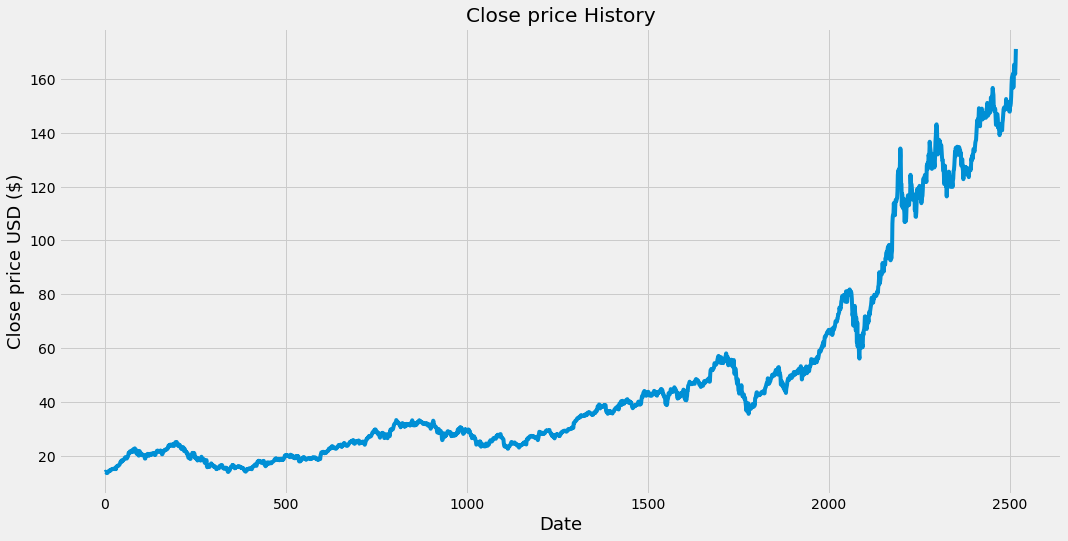

In [92]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

Creating a new Dataframe with only the 'Close' Column

In [93]:
df = data.filter(['Close'])

#convert the dataframe to a numpy array

dataset = df.values

#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

2014

Scale the data 
> creating mimax scaler object 

In [94]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00229945],
       [0.00265468],
       [0.00332516],
       ...,
       [0.94075348],
       [0.9628282 ],
       [1.        ]])

Creating the training data set
> creat the scaled training data set

In [95]:
train_data = scaled_data[0:training_data_len, :]


Split the data into X_train and Y_trian data set

In [96]:
X_train = []
Y_train = []


Creating a Loop

In [97]:
for i in range (60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  Y_train.append(train_data[i, 0])
  if i<=60:
   print(X_train)
   print(Y_train)
   print()

[array([0.00229945, 0.00265468, 0.00332516, 0.00292236, 0.00223602,
       0.00028291, 0.        , 0.00047067, 0.00074026, 0.00385356,
       0.0039652 , 0.00444222, 0.00552502, 0.00625006, 0.00536898,
       0.00593099, 0.00590372, 0.00731511, 0.00781559, 0.00885526,
       0.00984545, 0.00969385, 0.01003575, 0.00987971, 0.00961646,
       0.0092587 , 0.01036624, 0.01136531, 0.01105766, 0.0093697 ,
       0.01098027, 0.00939444, 0.0153413 , 0.01488141, 0.01548212,
       0.01677996, 0.01756589, 0.01750056, 0.01725824, 0.01829093,
       0.01926273, 0.02036393, 0.02214259, 0.02587817, 0.02593462,
       0.02801459, 0.02956871, 0.02689754, 0.02792642, 0.02790549,
       0.03078979, 0.03037938, 0.03113867, 0.03250249, 0.03326115,
       0.03544769, 0.03703986, 0.03749975, 0.03766087, 0.03493768])]
[0.03428051639618793]



Convert the Xtrain and  Y_train to numpy arrayes

In [98]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

Reshape the data

In [99]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1954, 60, 1)

Bulid The LSTM model

In [100]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM( 50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Compile the model

In [101]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [102]:
model.fit(X_train, Y_train, batch_size=1, epochs=10)

Epoch 1/10
1954/1954 [==============================] - 59s 28ms/step - loss: 1.7360e-04
Epoch 2/10
1954/1954 [==============================] - 55s 28ms/step - loss: 7.8167e-05
Epoch 3/10
1954/1954 [==============================] - 56s 28ms/step - loss: 5.9358e-05
Epoch 4/10
1954/1954 [==============================] - 56s 28ms/step - loss: 4.6617e-05
Epoch 5/10
1954/1954 [==============================] - 55s 28ms/step - loss: 4.6922e-05
Epoch 6/10
1954/1954 [==============================] - 55s 28ms/step - loss: 4.3227e-05
Epoch 7/10
1954/1954 [==============================] - 55s 28ms/step - loss: 4.1394e-05
Epoch 8/10
1954/1954 [==============================] - 54s 28ms/step - loss: 3.2124e-05
Epoch 9/10
1954/1954 [==============================] - 55s 28ms/step - loss: 3.4331e-05
Epoch 10/10
1954/1954 [==============================] - 56s 28ms/step - loss: 3.4470e-05


creat the testing dat set, 

create a new containing scaled values from index 1543 to 2003

In [103]:
test_data = scaled_data[training_data_len - 60:, :]

creat the data setes x_test and y_test

In [104]:
X_test = []
Y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i,0])


In [105]:
X_test = np.array(X_test)

Reshape the dat

In [106]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

get the models prdicted price value

In [107]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

get the root mean squared error (RMSE)

In [108]:
rmse = np.sqrt(np.mean( predictions - Y_test)**2)
rmse 

3.947411442599287

plot the data

In [109]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


visualized the data 

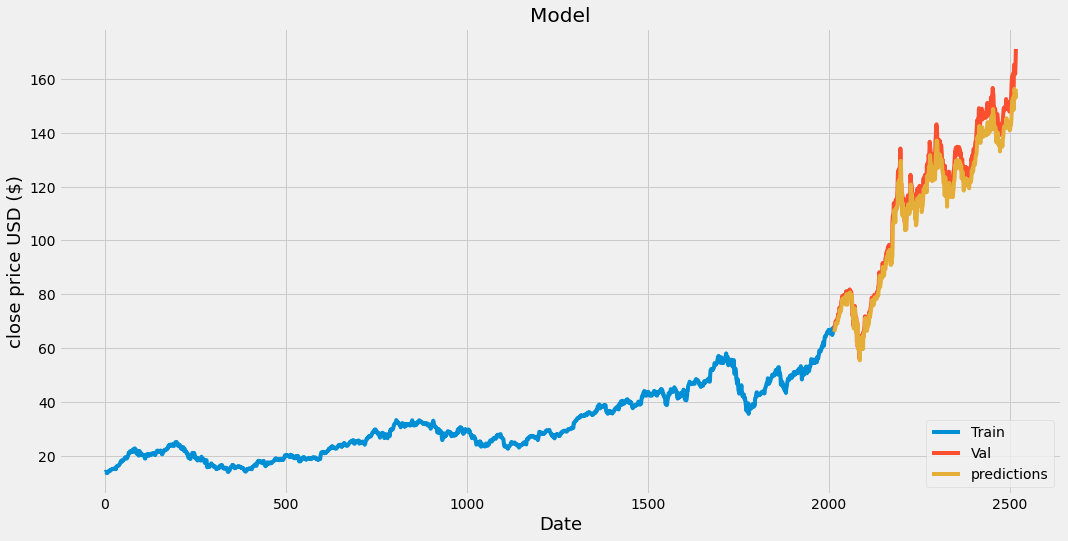

In [110]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc ="lower right")
plt.show()

show te valid and predicted prices

In [111]:
valid

,Date,Open,High,Low,Close,Volume,predictions
2014,12/10/2019,67.1500,67.5175,66.4650,67.1200,90529532,66.011230
2015,12/11/2019,67.2025,67.7750,67.1250,67.6925,78893564,66.424187
2016,12/12/2019,66.9450,68.1400,66.8303,67.8650,137748168,66.979813
2017,12/13/2019,67.8650,68.8250,67.7325,68.7875,133731224,67.149277
2018,12/16/2019,69.2500,70.1975,69.2450,69.9650,128324420,68.073410
...,...,...,...,...,...,...,...
2512,12/1/2021,167.4800,170.3000,164.5300,164.7700,152423003,156.363449
2513,12/2/2021,158.7350,164.2000,157.8000,163.7600,136739174,155.488434
2514,12/3/2021,164.0200,164.9600,159.7200,161.8400,118023116,154.669937
2515,12/6/2021,164.2900,167.8799,164.2800,165.3200,107496982,153.001678
